In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

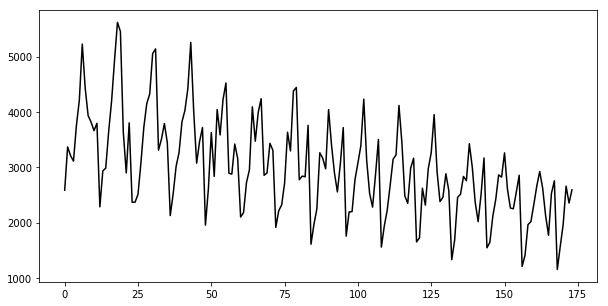

In [3]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

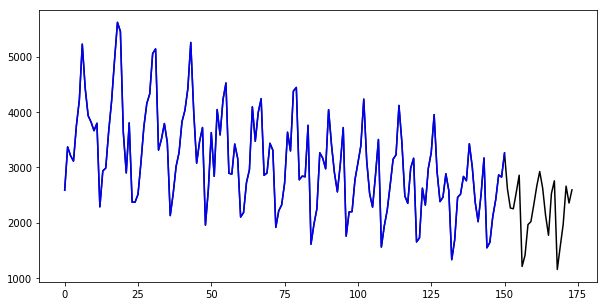

In [4]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

5) Начнем с простейших методов прогноза. Построим регрессионную модель тренда первого, второго и третьего порядка на основе методики, которая изучалась в лабораторной работе №3, а затем используем полученные регрессионные кривые для прогноза тренда.

6) Сначала для прогноза по методу регрессии используем готовые библиотеки. Например, с помощью sklearn:

In [5]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)

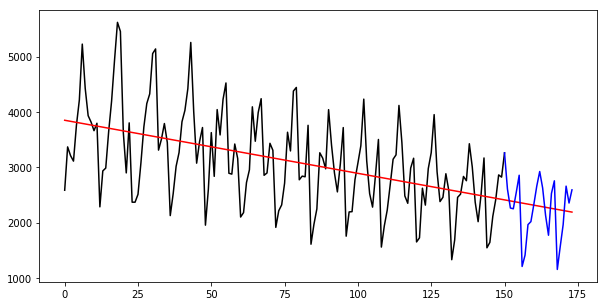

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

7) Напрямую через МНК библиотеки statsmodels:

[3849.23884629   -9.58949808]


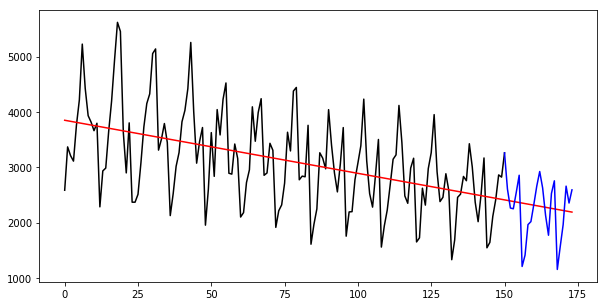

In [7]:
import statsmodels.api as sm

x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_)
res = smm.fit() # строим модель регрессии
print(res.params)
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # строим прогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

8) Через полиномиальные кривые polyfit:

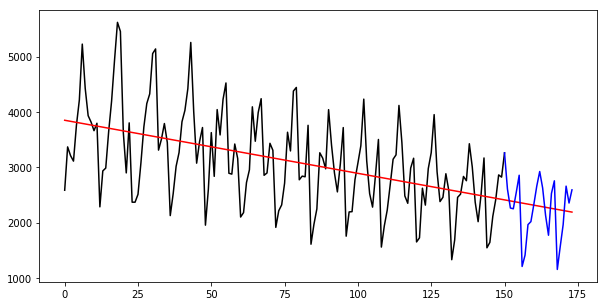

In [8]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1)
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

9) Через подгонку функций библиотеки scipy.optimize:

In [9]:
def func(t, b0, b1):
    return b0 + b1 * t

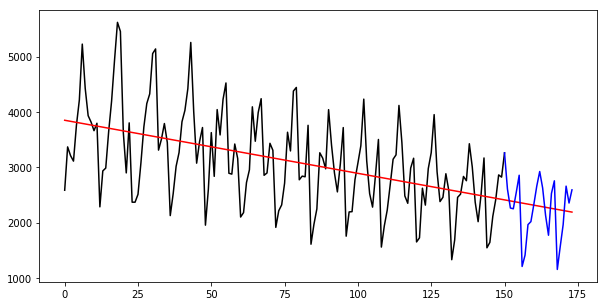

In [10]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

10) Теперь аналогичным образом постройте прогнозы трендов данного ряда для регрессионной кривой второго и третьего порядка, строя регрессионные модели тренда подобно тому, как это происходило в лабораторной работе №3.

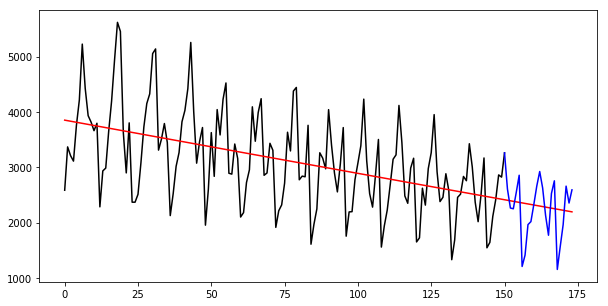

In [11]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2)
p2 = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p2(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

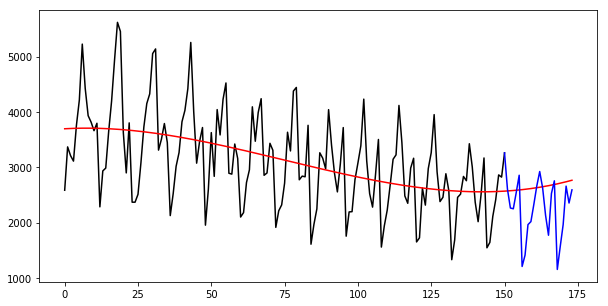

In [12]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3)
p3 = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p3(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

11) Оцените точность каждого из получившихся прогнозов с помощью следующих оценок (где M – число прогнозируемых точек):

Средняя ошибка прогноза:

In [13]:
from sklearn.metrics import mean_absolute_error

print('Lin Reg')
print(mean_absolute_error(reg.predict(t0[-24:]), Fort[-24:]))
print()

print('МНК')
print(mean_absolute_error(res.predict(sm.add_constant(t0[-24:])), Fort[-24:]))
print()

print('polyfit 1')
print(mean_absolute_error(p(t0[-24:]), Fort[-24:]))
print()

print('optimize')
print(mean_absolute_error(t0[-24:]*popt[1]+popt[0], Fort[-24:]))
print()

print('polyfit 2')
print(mean_absolute_error(p2(t0[-24:]), Fort[-24:]))
print()

print('polyfit 3')
print(mean_absolute_error(p3(t0[-24:]), Fort[-24:]))
print()

Lin Reg
437.01727779714184

МНК
437.01727779714184

polyfit 1
437.01727779714184

optimize
437.0172777967639

polyfit 2
436.6990845412031

polyfit 3
494.1128372648449



СКВО прогноза:

In [14]:
from sklearn.metrics import mean_squared_error

print('Lin Reg')
print(np.sqrt(mean_squared_error(reg.predict(t0[-24:]), Fort[-24:])))
print()

print('МНК')
print(np.sqrt(mean_squared_error(res.predict(sm.add_constant(t0[-24:])), Fort[-24:])))
print()

print('polyfit 1')
print(np.sqrt(mean_squared_error(p(t0[-24:]), Fort[-24:])))
print()

print('optimize')
print(np.sqrt(mean_squared_error(t0[-24:]*popt[1]+popt[0], Fort[-24:])))
print()

print('polyfit 2')
print(np.sqrt(mean_squared_error(p2(t0[-24:]), Fort[-24:])))
print()

print('polyfit 3')
print(np.sqrt(mean_squared_error(p3(t0[-24:]), Fort[-24:])))
print()

Lin Reg
531.284134980843

МНК
531.2841349808431

polyfit 1
531.284134980843

optimize
531.2841349811363

polyfit 2
531.5135713865609

polyfit 3
665.0082914257544



Средняя ошибка аппроксимации:

In [15]:
def mean_approximation_error(y_pred, y_true):
    
    if len(y_pred) != len(y_true) or len(y_pred) == 0:
        print('Length error')
        return
    
    M = len(y_pred)
    
    buf_sum = 0
    for index, _ in enumerate(y_pred):
        buf_sum += (np.abs(y_pred[index] - y_true[index]) / y_true[index]) * 100
        
    return (buf_sum / M)[0]

In [16]:
print('Lin Reg')
print(mean_approximation_error(reg.predict(t0[-24:]), Fort[-24:]))
print()

print('МНК')
print(mean_approximation_error(res.predict(sm.add_constant(t0[-24:])), Fort[-24:]))
print()

print('polyfit 1')
print(mean_approximation_error(p(t0[-24:]), Fort[-24:]))
print()

print('optimize')
print(mean_approximation_error(t0[-24:]*popt[1]+popt[0], Fort[-24:]))
print()

print('polyfit 2')
print(mean_approximation_error(p2(t0[-24:]), Fort[-24:]))
print()

print('polyfit 3')
print(mean_approximation_error(p3(t0[-24:]), Fort[-24:]))
print()

Lin Reg
23.514412988159805

МНК
23.514412988159805

polyfit 1
23.5144129881598

optimize
23.51441298819064

polyfit 2
23.53339382848849

polyfit 3
29.30517639635917



Коэффициент несоответствия 1

In [17]:
def mismatch_rate_1(y_pred, y_true):
    
    if len(y_pred) != len(y_true) or len(y_pred) == 0:
        print('Length error')
        return
    
    M = len(y_pred)
    
    numerator = 0
    denominator = 0
    for index, _ in enumerate(y_pred):
        numerator += (y_pred[index] - y_true[index]) * (y_pred[index] - y_true[index])
        denominator += y_true[index] * y_true[index]
        
    return (np.sqrt(numerator / denominator))[0]

In [18]:
print('Lin Reg')
print(mismatch_rate_1(reg.predict(t0[-24:]), Fort[-24:]))
print()

print('МНК')
print(mismatch_rate_1(res.predict(sm.add_constant(t0[-24:])), Fort[-24:]))
print()

print('polyfit 1')
print(mismatch_rate_1(p(t0[-24:]), Fort[-24:]))
print()

print('optimize')
print(mismatch_rate_1(t0[-24:]*popt[1]+popt[0], Fort[-24:]))
print()

print('polyfit 2')
print(mismatch_rate_1(p2(t0[-24:]), Fort[-24:]))
print()

print('polyfit 3')
print(mismatch_rate_1(p3(t0[-24:]), Fort[-24:]))
print()

Lin Reg
0.2281001855331433

МНК
0.2281001855331433

polyfit 1
0.2281001855331433

optimize
0.22810018553326916

polyfit 2
0.2281986911787414

polyfit 3
0.28551297633000605



Коэффициент несоответствия 2

In [19]:
def mismatch_rate_2(y_pred, y_true):
    
    if len(y_pred) != len(y_true) or len(y_pred) == 0:
        print('Length error')
        return
    
    M = len(y_pred)
    
    numerator = 0
    denominator = 0
    for index, _ in enumerate(y_pred):
        numerator += (y_pred[index] - y_true[index]) * (y_pred[index] - y_true[index])
        denominator += (np.mean(y_pred) - y_true[index]) * (np.mean(y_pred) - y_true[index])
        
    return (np.sqrt(numerator / denominator))[0]

In [20]:
print('Lin Reg')
print(mismatch_rate_2(reg.predict(t0[-24:]), Fort[-24:]))
print()

print('МНК')
print(mismatch_rate_2(res.predict(sm.add_constant(t0[-24:])), Fort[-24:]))
print()

print('polyfit 1')
print(mismatch_rate_2(p(t0[-24:]), Fort[-24:]))
print()

print('optimize')
print(mismatch_rate_2(t0[-24:]*popt[1]+popt[0], Fort[-24:]))
print()

print('polyfit 2')
print(mismatch_rate_2(p2(t0[-24:]), Fort[-24:]))
print()

print('polyfit 3')
print(mismatch_rate_2(p3(t0[-24:]), Fort[-24:]))
print()

Lin Reg
0.9886411663018166

МНК
0.9886411663018168

polyfit 1
0.9886411663018166

optimize
0.9886411663018202

polyfit 2
0.9886768800491392

polyfit 3
1.0118601806042062



12) Постройте доверительные интервалы для тренда первого порядка на рисунке вместе с прогнозом и самим рядом

In [21]:
def s(y_pred, y_true):
    N = len(y_pred)
    
    if N <= 2:
        raise Exception('Length error')
    
    buf_sum = 0
    for index, _ in enumerate(y_pred):
        buf_sum += (y_pred[index] - y_true[index]) * (y_pred[index] - y_true[index])
        
    return np.sqrt(buf_sum / (N - 2))[0]

In [22]:
def sigma(y_pred, y_true):
    
    if len(y_pred) != len(y_true) or len(y_pred) == 0:
        raise Exception('Length error')
    
    N = len(y_pred)
    S = s(y_pred, y_true)
    
    numerator = (y_pred - np.mean(y_true)) * (y_pred - np.mean(y_true))
    denominator = 0
    for index, _ in enumerate(y_pred):
        denominator += (y_true[index] - np.mean(y_true)) * (y_true[index] - np.mean(y_true))
    
    fraction = numerator / denominator
    
    my_sqrt = np.sqrt(1 + 1/N + fraction)
    
    return 1.96 * S * my_sqrt

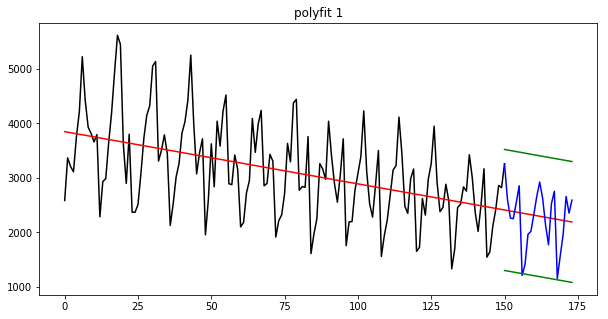

In [23]:
sig = sigma(p(t0)[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], p(t0)[-24:] + sig, 'g')
plt.plot(t0[-24:], p(t0)[-24:] - sig, 'g')
plt.title('polyfit 1')
plt.show()

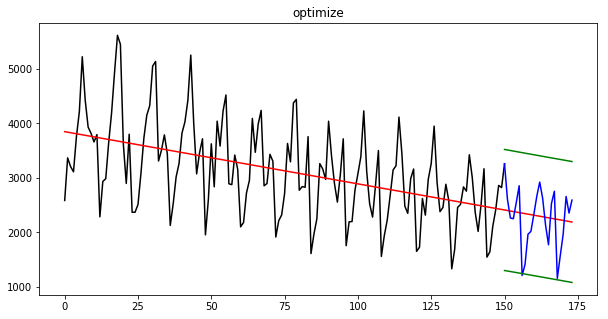

In [24]:
opt = t0*popt[1]+popt[0]

sig = sigma(opt[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, opt, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], opt[-24:] + sig, 'g')
plt.plot(t0[-24:], opt[-24:] - sig, 'g')
plt.title('optimize')
plt.show()

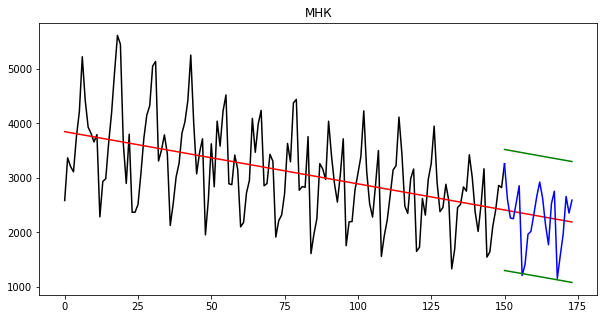

In [25]:
mnk = res.predict(sm.add_constant(t0))

sig = sigma(mnk[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, mnk, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], mnk[-24:] + sig, 'g')
plt.plot(t0[-24:], mnk[-24:] - sig, 'g')
plt.title('МНК')
plt.show()

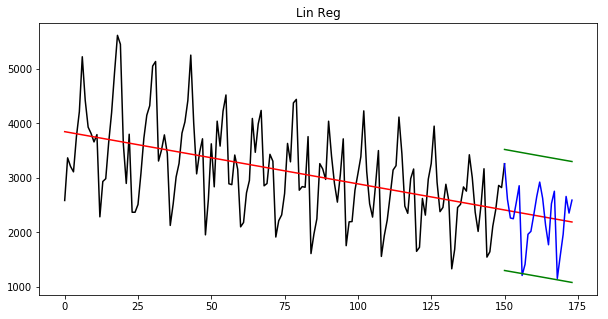

In [26]:
lin_reg = reg.predict(t0)

sig = sigma(lin_reg[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, lin_reg, 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], lin_reg[-24:] + sig, 'g')
plt.plot(t0[-24:], lin_reg[-24:] - sig, 'g')
plt.title('Lin Reg')
plt.show()

13) Постройте доверительные интервалы для тренда второго и третьего порядка на рисунке вместе с прогнозом и самим рядом, используя более простые эмпирические оценки

In [27]:
def sigma_v2(y_pred, y_true):
    if len(y_pred) != len(y_true) or len(y_pred) == 0:
        raise Exception('Length error')
    
    M = len(y_pred)
    
    buf_sum = 0
    for index, _ in enumerate(y_pred):
        buf_sum += (y_true[index] - y_pred[index]) * (y_true[index] - y_pred[index])
        
    return 1.96 * np.sqrt(buf_sum / M)[0]

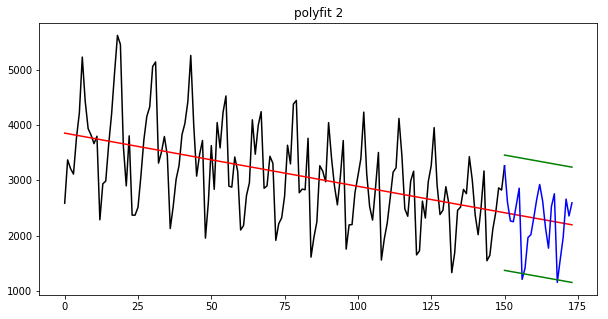

In [28]:
sig = sigma_v2(p2(t0)[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p2(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], p2(t0)[-24:] + sig, 'g')
plt.plot(t0[-24:], p2(t0)[-24:] - sig, 'g')
plt.title('polyfit 2')
plt.show()

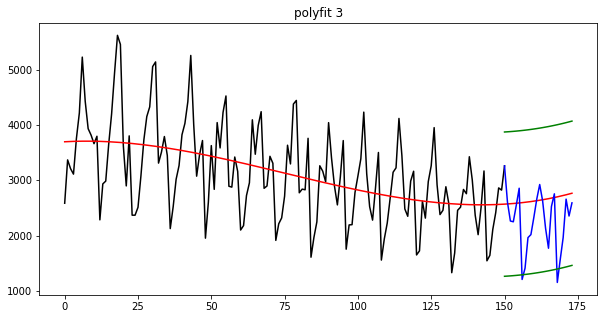

In [29]:
sig = sigma_v2(p3(t0)[-24:], Fort[-24:])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p3(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], p3(t0)[-24:] + sig, 'g')
plt.plot(t0[-24:], p3(t0)[-24:] - sig, 'g')
plt.title('polyfit 3')
plt.show()

14) Метод построения регрессионной кривой через подгонку функций библиотеки scipy.optimize позволяет по МНК задавать любую форму кривой. Попробуйте самостоятельно задать некоторую параметрическую кривую, которая давала бы более высокую точность, нежели простые линейные регрессионные кривые. Оцените ее точность аналогично и постройте эмпирические оценки доверительных интервалов.

In [30]:
def func_2(t, b0, b1, b2, b3):
    return b0 + b1*t + b2*np.sin(b3*t)

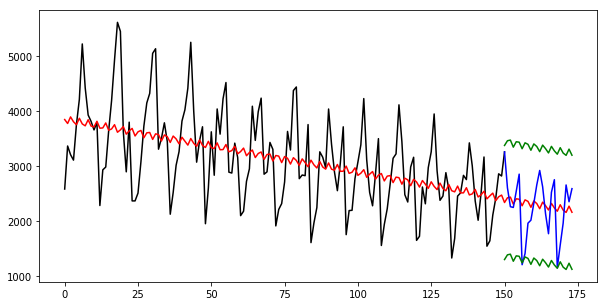

In [31]:
popt2, pcov2 = curve_fit(func_2, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
my_curve = func_2(t0, popt2[0], popt2[1], popt2[2], popt2[3])
sig = sigma_v2(my_curve[-24:], Fort[-24:])

plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, my_curve, 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], my_curve[-24:] + sig, 'g')
plt.plot(t0[-24:], my_curve[-24:] - sig, 'g')
plt.show()

In [32]:
print('mean_absolute_error')
print(mean_absolute_error(my_curve[-24:], Fort[-24:]))
print()

print('СКВО')
print(np.sqrt(mean_squared_error(my_curve[-24:], Fort[-24:])))
print()

print('Средняя ошибка аппроксимации') 
print(mean_approximation_error(my_curve[-24:], Fort[-24:])) 
print()

print('Коэффициент несоответствия 1') 
print(mismatch_rate_1(my_curve[-24:], Fort[-24:])) 
print()

print('Коэффициент несоответствия 2') 
print(mismatch_rate_2(my_curve[-24:], Fort[-24:])) 
print()

mean_absolute_error
427.5825221434737

СКВО
529.6377904517544

Средняя ошибка аппроксимации
22.912423598109587

Коэффициент несоответствия 1
0.22739334814085013

Коэффициент несоответствия 2
0.9856837471173319



15) Теперь обратимся к прогнозированию на основе АРПСС моделей. Но прежде, чем строить такую модель, обратите внимание: модели АРПСС строятся для рядов с около-нулевым средним, что неверно для заданного временного ряда. Поэтому – сначала постройте линейный тренд прогнозируемого ряда (см. линейную регрессию первого порядка выше), а затем вычтите его из исходного ряда, приведя его к нулевому среднему значению (к так называемой трендстационарной форме).

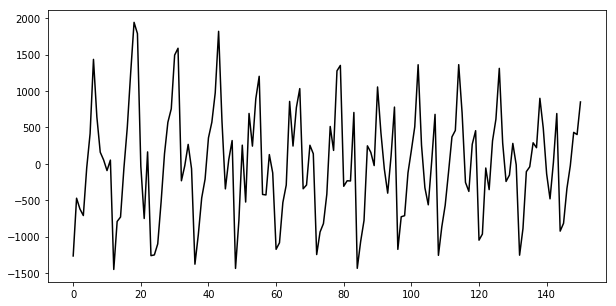

In [33]:
Z_minus_trend = Z - lin_reg[:151]

plt.figure(figsize = (10, 5))
plt.plot(t, Z_minus_trend, 'k')
plt.show()

16) Подберите для данного приведенного к нулю ВР модель АРПСС (p, d, q) некоторого порядка (все параметры целиком и полностью определяются самим студентом) подобно методике из лабораторной работы № 4. Например, была найдена некоторая наилучшая модель:

In [34]:
arimaz = ARIMA(Z_minus_trend, order = (5, 0, 4))
model_fit = arimaz.fit(disp = False) 
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(5, 4)   Log Likelihood               -1130.519
Method:                       css-mle   S.D. of innovations            420.504
Date:                Mon, 20 May 2019   AIC                           2283.038
Time:                        14:47:09   BIC                           2316.228
Sample:                             0   HQIC                          2296.522
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6751     28.460      0.094      0.925     -53.106      58.457
ar.L1.y        1.6216      0.103     15.673      0.000       1.419       1.824
ar.L2.y       -1.7952      0.185     -9.705      0.0

17) Тогда график прогноза по данной модели вместе с доверительными интервалами строится очень легко:

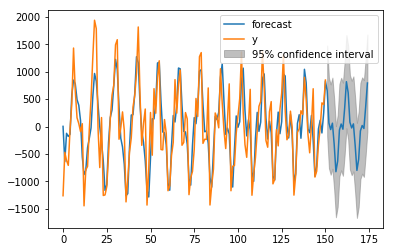

In [35]:
model_fit.plot_predict(0, len(Fort));

18) Но хотелось бы все же увидеть – как же этот прогноз по АРПСС модели соотносится с исходными известными 24 прогнозными точками (ведь прогноз все-таки ретроспективный). Для этого нужно из исходного ряда Fort тоже вычесть линейный тренд и соотнести их на одном изображении:

<Figure size 720x360 with 0 Axes>

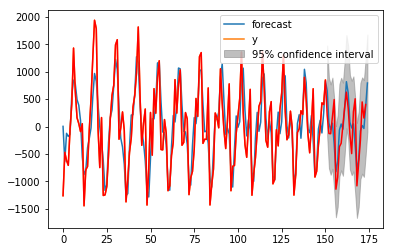

In [36]:
plt.figure(figsize = (10, 5))
model_fit.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort-(lin_reg), 'r') # исходный ВР минус тренд
plt.show()

19) Сами прогнозные значения по модели АРПСС можно получить с помощью функции predict: 

In [37]:
model_fit.predict(len(Z), len(Fort))

array([ 653.95909683,   63.54760189,  -55.67681878,   60.89115304,
       -320.32731617, -825.66910873, -631.56424227,  -65.44523326,
         45.86217328,  -49.1558497 ,  336.70633476,  818.95991824,
        620.22679035,   78.18133827,  -26.29848918,   48.0385317 ,
       -341.48365929, -801.51562315, -599.11050511,  -80.2620455 ,
         18.3406268 ,  -36.16990415,  356.10045977,  794.76874003])

In [38]:
new_pred = model_fit.predict(len(Z), len(Fort))

20) Используйте эти значения для оценки точности прогноза на основе оценок из пункта 11 выше.

In [39]:
print('mean_absolute_error')
print(mean_absolute_error(new_pred, Fort[-24:]))
print()

print('СКВО')
print(np.sqrt(mean_squared_error(new_pred, Fort[-24:])))
print()

print('Средняя ошибка аппроксимации') 
print(mean_approximation_error(new_pred, Fort[-24:])) 
print()

print('Коэффициент несоответствия 1') 
print(mismatch_rate_1(new_pred, Fort[-24:])) 
print()

print('Коэффициент несоответствия 2') 
print(mismatch_rate_2(new_pred, Fort[-24:])) 
print()

mean_absolute_error
2263.962334596589

СКВО
2331.239169213826

Средняя ошибка аппроксимации
102.46389293084049

Коэффициент несоответствия 1
1.0008883232302401

Коэффициент несоответствия 2
1.0019855191956089



21) Наконец, попробуйте построить АРПСС модель для прогнозирования данного ряда, но без исходного вычитания из него линейного тренда. Отметьте получившиеся отличия в работе функций Python и точности конечных результатов.

In [40]:
arimaz = ARIMA(Z, order = (6, 0, 5))
model_fit2 = arimaz.fit(disp = False) 
print(model_fit2.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                     ARMA(6, 5)   Log Likelihood               -1156.310
Method:                       css-mle   S.D. of innovations            492.235
Date:                Mon, 20 May 2019   AIC                           2338.619
Time:                        14:47:17   BIC                           2377.844
Sample:                             0   HQIC                          2354.554
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3127.2670    238.213     13.128      0.000    2660.379    3594.155
ar.L1.y        1.7142      0.128     13.359      0.000       1.463       1.966
ar.L2.y       -1.1346      0.319     -3.562      0.0

22) Аналогично, для данной модели постройте графики прогноза с доверительными интервалами относительно оригинального ряда Fort, а также оцените точность прогноза на основе оценок из пункта 11 выше.

<Figure size 720x360 with 0 Axes>

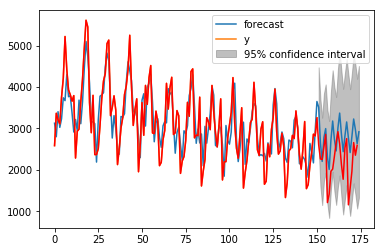

In [41]:
plt.figure(figsize = (10, 5))
model_fit2.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort, 'r')
plt.show()

In [42]:
new_pred_2 = model_fit2.predict(len(Z), len(Fort))

In [43]:
print('mean_absolute_error')
print(mean_absolute_error(new_pred_2, Fort[-24:]))
print()

print('СКВО')
print(np.sqrt(mean_squared_error(new_pred_2, Fort[-24:])))
print()

print('Средняя ошибка аппроксимации') 
print(mean_approximation_error(new_pred_2, Fort[-24:])) 
print()

print('Коэффициент несоответствия 1') 
print(mismatch_rate_1(new_pred_2, Fort[-24:])) 
print()

print('Коэффициент несоответствия 2') 
print(mismatch_rate_2(new_pred_2, Fort[-24:])) 
print()

mean_absolute_error
574.5034479374809

СКВО
712.6866392714365

Средняя ошибка аппроксимации
31.68006165468162

Коэффициент несоответствия 1
0.30598307749330544

Коэффициент несоответствия 2
0.9505868775316296

